### Python

 Задача

Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.

Реализуйте функцию, которая будет строить графики по получаемым метрикам.

In [216]:
# предположим у нас уже есть дата фрейм рабочий ( это дата фрейм который учитывает только активных пользователей)

work_df = groups.merge(active_studs, left_on = 'id' , right_on = 'student_id' , how = 'inner')

work_df = work_df.merge(checks, on = 'student_id', how = 'left')

work_df = work_df.fillna(0)
work_df.head()

,id,grp,student_id,rev
0,1627,A,1627,990.0
1,2085,B,2085,0.0
2,2215,B,2215,0.0
3,3391,A,3391,0.0
4,3401,B,3401,0.0


In [217]:
#  у нас есть путь к файлу , который надо подгрузить к основному

df_add = r'C:\Users\mesii\Jupiter 2.0\Karpov\lesson\final_project\Проект_2_group_add.csv'

In [218]:
sep = "," #разделитель

In [219]:
# Напишем фуекцию , которая будет подгружать данные в уже рабочий дата фрейм

def get_update(work_df, df_add, sep):
    
    group_add_df = pd.read_csv(df_add, sep=sep)
    
# добавляем строку в итоговый дф
    df_all = pd.concat([work_df, group_add_df])
    
    return df_all        
    
    
    

In [220]:
data_total = get_update(work_df, df_add, sep)
data_total.shape

(8420, 4)

In [221]:
# Создадим функцию, которая на основе новых данных будет пересчитывать метрики
def metrix2(data_total):
    CR_A = round(data_total.query('grp == "A" & rev > 0.0 ').student_id.count()/data_total.query('grp == "A"').student_id.count(),3)
    CR_B = round(data_total.query('grp == "B" & rev > 0.0 ').student_id.count()/data_total.query('grp == "B"').student_id.count(),3)
    ARPU_A = round(data_total.query('grp == "A" & rev > 0.0 ').rev.sum()/data_total.query('grp == "A"').id.count(),3)
    ARPU_B = round(data_total.query('grp == "B" & rev > 0.0 ').rev.sum()/data_total.query('grp == "B"').id.count(),3)
    ARPPU_A = round(data_total.query('grp == "A" & rev > 0.0 ').rev.sum()/data_total.query('grp == "A" & rev > 0.0 ').id.count(),2)
    ARPPU_B = round(data_total.query('grp == "B" & rev > 0.0 ').rev.sum()/data_total.query('grp == "B" & rev > 0.0 ').id.count(),2)

    data = {'grp': ['A', 'B'],
           'CR' : [CR_A, CR_B],
           'ARPU': [ARPU_A, ARPU_B],
           'ARPPU' : [ARPPU_A, ARPPU_B]}  
    
    data_met = pd.DataFrame.from_dict(data)
    
    return(data_met)
    

In [222]:
metrix_2 = metrix2(data_total)


In [223]:
metrix_2

,grp,CR,ARPU,ARPPU
0,A,0.051,46.769,933.59
1,B,0.046,57.274,1255.83


In [224]:
# Напишем функцию, которая будет отрисовывать графики по навым метрикам

In [225]:
def metrix_2_plots(data_met):
    sns.set_theme(style="whitegrid")
    fig, axs = plt.subplots(ncols=3, figsize=(19, 5))
    sns.barplot(x="grp", y="CR", data=metrix_2, ax=axs[0]).set_title('CR'),
    sns.barplot(x="grp", y="ARPU", data=metrix_2, ax=axs[1]).set_title('ARPU'),
    sns.barplot(x="grp", y="ARPPU", data=metrix_2, ax=axs[2]).set_title('ARPPU')
    

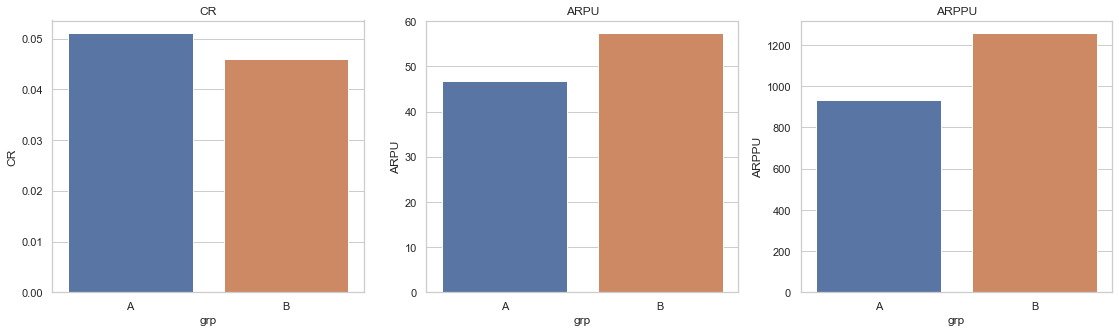

In [226]:
metrix_2_plots(metrix_2)